# Import Packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.model_selection import train_test_split

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

chemin = "drive/MyDrive/BME/Artificial_Intelligence_in_Data_Science/class_4/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Creation of data

In [ ]:
N = 500
np.random.seed(12345)
train_x = np.random.random((N,2)) * 2.0 - 1.0
train_y = np.array([((train_x[:,0]**2+train_x[:,1]**2)<1) + 0]).T
print(np.shape(train_x),np.shape(train_y))

(500, 2) (500, 1)


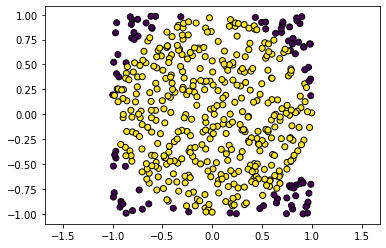

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=train_y[:,0],edgecolors='black');

# Activation function

In [ ]:
class Sigmoid :
  def f(Z):
      return 1/(1+np.exp(-Z))
  def df(Z):
    sig = Sigmoid.f(Z)
    return sig * (1 - sig)

class Relu :
  def f(Z):
    return np.maximum(0,Z)

  def df(Z):
    return np.array(np.array(Z) >= 0,int)


# Class Layer

In [ ]:
class Layer:
  def __init__(self,layer_activation, number_of_neurons, previous_layer=None,  nn=None):
    self.layer_activation=layer_activation
    self.number_of_neurons=number_of_neurons

    self.previous_layer=previous_layer
    self.nn = nn
    self.W = None
    self.b = None
    
  def create_W(self):
    self.W = np.random.random((self.previous_layer.number_of_neurons,self.number_of_neurons))*2-1
    self.b = np.zeros((1,self.number_of_neurons))
    pass
  


# Class NeuralNetwork (with bias)

In [1]:
class NeuralNetwork:
  def __init__(self, layers):
    self.layers = layers

    self.create_relation()

    self.memA = []
    self.memZ = []
  
  def create_relation(self):
    for i in range(len(self.layers)) :
      self.layers[i].nn=self
      if i > 0 :
        self.layers[i].nn=self
        self.layers[i].previous_layer=self.layers[i-1]
        self.layers[i].create_W()
      else :
        self.layers[i].previous_layer="input"


  def create_mem(self, X):
    N = len(X)

    for layer in self.layers :
      self.memA.append(np.zeros((N,layer.number_of_neurons)))
      self.memZ.append(np.zeros((N,layer.number_of_neurons)))


  def feed_forward_with_mem(self,X):
    self.create_mem(X)
    self.memA[0] = X
    for i in range(0,len(self.layers)-1):
      print(np.dot(self.memA[i],self.layers[i+1].W).shape, print(self.layers[i+1].b.shape))
      self.memZ[i+1] = np.dot(self.memA[i],self.layers[i+1].W) + self.layers[i+1].b
      self.memA[i+1] = self.layers[i].layer_activation.f(self.memZ[i+1])

    return self.memA[i]

  def back_propagation(self,Y,alpha=0.1):
    w = len(self.layers)-1
    Y_res = self.memA[w]
    deltaA = Y - Y_res

    for l in reversed(range(w)):
      m =  self.memA[l].shape[1]

      deltaZ = deltaA * (self.layers[l].layer_activation.df(self.memZ[l+1]))
      deltaA = deltaZ.dot(self.layers[l+1].W.T)
      
      self.layers[l+1].W += self.memA[l].T.dot(deltaZ)*alpha/m
      self.layers[l+1].b += np.sum(deltaZ,axis=0)*alpha/m


  def train(self, train_x, train_y, epoch, alpha=0.1, verbose = False):
    acc = np.zeros(epoch)
    for i in range(epoch):
      if verbose :
        print("Epoch : ", i)
      self.feed_forward_with_mem(train_x)

      acc[i] = np.mean(train_y == np.array(self.memA[len(self.layers)-1]>0.5,int))
      self.back_propagation(train_y,alpha)
    return acc

  def predict(self, test_x):
    self.feed_forward_with_mem(test_x)
    return np.array(self.memA[len(self.layers)-1]>0.5,int)

# Creation of NN

In [ ]:
nn = NeuralNetwork([Layer(Sigmoid,2),Layer(Sigmoid,7),Layer(Sigmoid,7),Layer(Sigmoid,1)])

# Train

In [ ]:
EPOCHS = 10_000
acc_nn = nn.train(train_x, train_y, EPOCHS)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None
(1, 7)
(500, 7) Non

We have some pretty good result

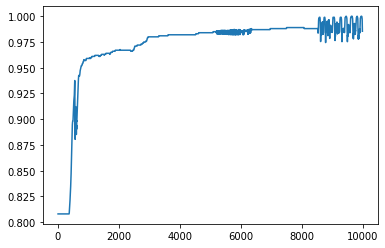

In [ ]:
acc_nn_smooth = pd.Series(acc_nn).rolling(14).mean().shift(-7) # we make a moving average to make the curve more smooth
plt.plot(range(EPOCHS),acc_nn_smooth)
plt.show()

In [ ]:
pred = nn.predict(train_x)

(1, 7)
(500, 7) None
(1, 7)
(500, 7) None
(1, 1)
(500, 1) None


In [ ]:
np.mean(pred == train_y) 

0.98

We see that the predictions are very close to the point set that we want. Although if we add points that are in the circle, it doesn't mean the NN will know how to correctly classify it because what we see is the prediction of the training set and not a test set.

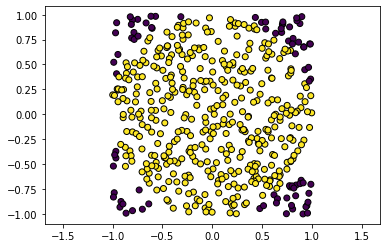

In [ ]:
plt.axis('equal')
plt.scatter(train_x[:,0],train_x[:,1],c=pred,edgecolors='black');

# Titanic


## Preparation of data

In [ ]:
data = pd.read_csv(chemin+'titanic.csv', sep = ";")
data = data.drop(["Name",'Cabin', "Ticket", "Embarked","PassengerId"],1,inplace=False)
data[:5]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
def cleaning(data):
  data = data.dropna(subset = ["Age","Sex",'Pclass',"SibSp","Parch",'Survived'])
  return data

In [ ]:
def create_section_of_age(data):
  bins= [0,1,10,20,30,40,50,1000]
  labels = ['0','1-10','11-20','21-30','31-40','41-50','51-1000']
  data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)
  return data

In [ ]:
def create_gender(data):
  data['Gender'] = np.array((data['Sex'] == 'female'),dtype=int)
  return data

In [ ]:
def create_nb_parents_children(data):
  data['Parch_bin'] = np.array((data['Parch'] >= 1),dtype=int)
  return data

In [ ]:
def create_nb_siblings(data):
  data['SibSp_bin'] = np.array((data['SibSp'] >= 1),dtype=int)
  return data

In [ ]:
print(data.shape)
data = cleaning(data)
print(data.shape)
# we have eliminated some rows

(891, 7)
(714, 7)


In [ ]:
data = create_section_of_age(data)
data = create_nb_parents_children(data)
data = create_nb_siblings(data)
data[:8]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,AgeGroup,Parch_bin,SibSp_bin
0,0,3,male,22.0,1,0,7.2500,21-30,0,1
1,1,1,female,38.0,1,0,71.2833,31-40,0,1
2,1,3,female,26.0,0,0,7.9250,21-30,0,0
3,1,1,female,35.0,1,0,53.1000,31-40,0,1
4,0,3,male,35.0,0,0,8.0500,31-40,0,0
6,0,1,male,54.0,0,0,51.8625,51-1000,0,0
7,0,3,male,2.0,3,1,21.0750,1-10,1,1
8,1,3,female,27.0,0,2,11.1333,21-30,1,0


In [ ]:
final_data = pd.get_dummies(data, drop_first=True).dropna()
final_data[:5]

,Survived,Pclass,Age,SibSp,Parch,Fare,Parch_bin,SibSp_bin,Sex_male,AgeGroup_1-10,AgeGroup_11-20,AgeGroup_21-30,AgeGroup_31-40,AgeGroup_41-50,AgeGroup_51-1000
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,1,0,0,0
1,1,1,38.0,1,0,71.2833,0,1,0,0,0,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,0,0,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,1,0,0,0,0,1,0,0
4,0,3,35.0,0,0,8.0500,0,0,1,0,0,0,1,0,0


In [ ]:
X = final_data.drop(['Survived'],1,inplace=False)
y = final_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy() 
y_train = y_train.to_numpy().reshape((y_train.shape[0], 1))
y_test = y_test.to_numpy().reshape((y_test.shape[0], 1))

## Creation of NN

In [ ]:
nn = NeuralNetwork([Layer(Sigmoid,X_train.shape[1]),Layer(Relu,7),Layer(Sigmoid,7),Layer(Sigmoid,1)])

In [ ]:
EPOCHS = 10000
acc_nn = nn.train(X_train, y_train, EPOCHS,0.01)

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) Non

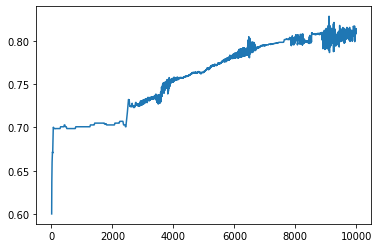

In [ ]:
acc_nn_smooth = pd.Series(acc_nn).rolling(14).mean().shift(-7)

plt.plot(range(EPOCHS),acc_nn_smooth)
plt.show()

In [ ]:
pred = nn.predict(X_test)

(1, 7)
(236, 7) None
(1, 7)
(236, 7) None
(1, 1)
(236, 1) None


In [ ]:
np.mean(pred == y_test) 

0.7838983050847458

Others NN

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) None
(1, 1)
(478, 1) None
(1, 10)
(478, 10) None
(1, 7)
(478, 7) None
(1, 3)
(478, 3) No

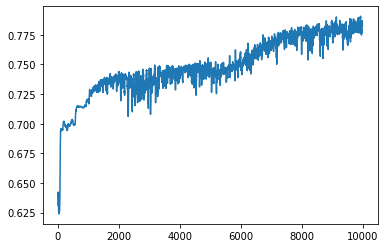

(1, 10)
(236, 10) None
(1, 7)
(236, 7) None
(1, 3)
(236, 3) None
(1, 1)
(236, 1) None


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


0.7245762711864406

In [ ]:
nn = NeuralNetwork([Layer(Sigmoid,X_train.shape[1]),Layer(Relu,10),Layer(Sigmoid,7),Layer(Relu,3),Layer(Sigmoid,1)])

EPOCHS = 10000
acc_nn = nn.train(X_train, y_train, EPOCHS,0.01)

acc_nn_smooth = pd.Series(acc_nn).rolling(14).mean().shift(-7)
plt.plot(range(EPOCHS),acc_nn_smooth)
plt.show()

pred = nn.predict(X_test)
np.mean(pred == y_test) 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) None
(1, 7)
(478, 7) None
(1, 1)
(478, 1) Non

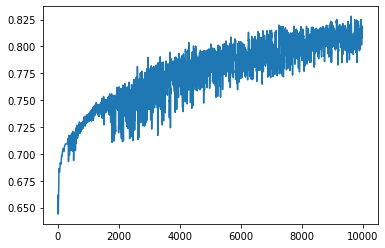

(1, 7)
(236, 7) None
(1, 1)
(236, 1) None


0.7669491525423728

In [ ]:
nn = NeuralNetwork([Layer(Sigmoid,X_train.shape[1]),Layer(Sigmoid,7),Layer(Sigmoid,1)])

EPOCHS = 10000
acc_nn = nn.train(X_train, y_train, EPOCHS,0.01)

acc_nn_smooth = pd.Series(acc_nn).rolling(14).mean().shift(-7)
plt.plot(range(EPOCHS),acc_nn_smooth)
plt.show()

pred = nn.predict(X_test)
np.mean(pred == y_test) 

In [ ]:
nn = NeuralNetwork([Layer(Sigmoid,X_train.shape[1]),Layer(Relu,15),Layer(Sigmoid,10),Layer(Relu,4),Layer(Sigmoid,4),Layer(Sigmoid,1)])

EPOCHS = 10000
acc_nn = nn.train(X_train, y_train, EPOCHS,0.01)

acc_nn_smooth = pd.Series(acc_nn).rolling(14).mean().shift(-7)
plt.plot(range(EPOCHS),acc_nn_smooth)
plt.show()

pred = nn.predict(X_test)
np.mean(pred == y_test) 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)
(478, 15) None
(1, 10)
(478, 10) None
(1, 4)
(478, 4) None
(1, 4)
(478, 4) None
(1, 1)
(478, 1) None
(1, 15)


We could try to change the architecture to find the best one for the accuracy (different active functions, learning rate, number of neurons in layer, number of layer) 